## PCA Implementation from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load IRIS
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(X.shape)

(150, 4)


In [6]:
# Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X_mean, axis=0)
X_stdzd = (X-X_mean) / X_std

In [7]:
# COV matrix
cov_matrix = np.cov(X_stdzd.T)
cov_matrix

array([[ 0.24840019, -0.0153722 ,  0.46163511,  0.18702487],
       [-0.0153722 ,  0.06882218, -0.11942173, -0.04406523],
       [ 0.46163511, -0.11942173,  1.12890672,  0.46934908],
       [ 0.18702487, -0.04406523,  0.46934908,  0.21047606]])

In [8]:
# Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [1.53172814 0.08791021 0.02833227 0.00863453]
Eigenvectors:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [9]:
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues
explained_variance_ratio = explained_variance / total_variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print(f"eigen_values [variance per Pc]: {explained_variance}")
print(f"explained_variance_ratio: {explained_variance_ratio}")
print(f"cumulative_explained_variance: {cumulative_explained_variance}")

eigen_values [variance per Pc]: [1.53172814 0.08791021 0.02833227 0.00863453]
explained_variance_ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
cumulative_explained_variance: [0.92461872 0.97768521 0.99478782 1.        ]


([<matplotlib.axis.XTick at 0x115a39a90>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

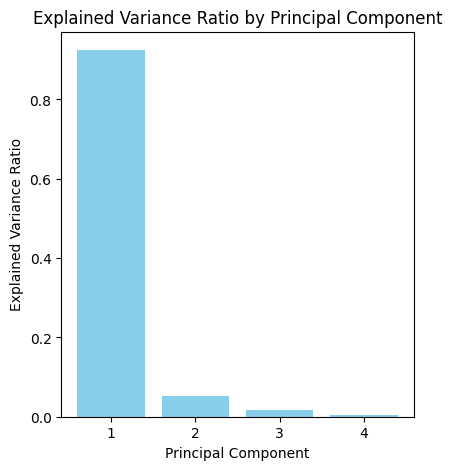

In [10]:
# Plot explained variance

plt.figure(figsize=(10, 5))

# Bar chart for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, 5), explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks([1,2,3,4])

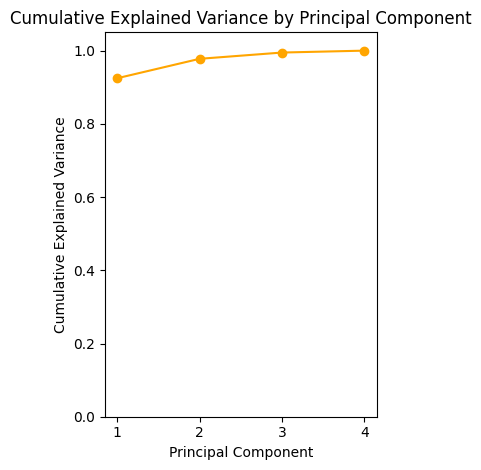

In [11]:
# Line chart for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, 5), cumulative_explained_variance, marker='o', color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xticks([1,2,3,4])
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [12]:
W = eigenvectors[:, :2]
X_pca = X_stdzd.dot(W)

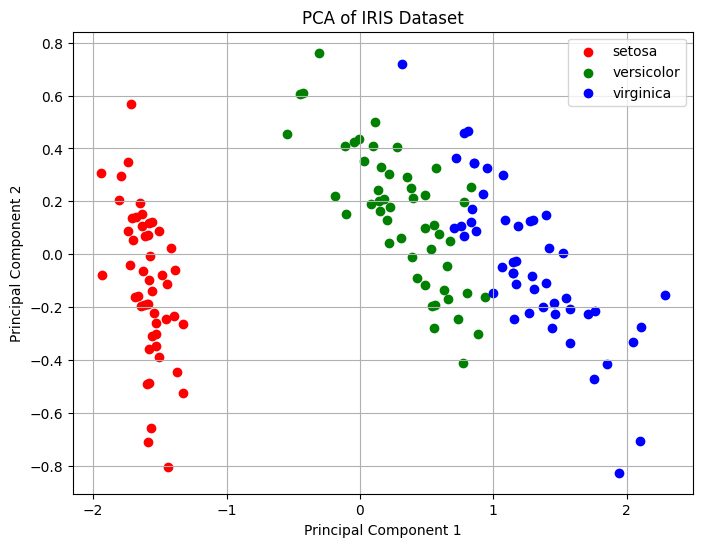

In [13]:
# Plot PCA result
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

for label, c in zip([0,1,2], colors):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=iris.target_names[label], color=c)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.grid()
plt.show()